##**Importing Necessary Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
#Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Sms Spam Classification/sms+spam+collection/SMSSpamCollection", sep='\t', names=['label', 'message'])

In [94]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##**Data Preprocessing**

In [96]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
corpus = []

for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
  review = review.lower()
  review = review.split()

  review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [99]:
df['cleaned_message'] = corpus

In [100]:
df.head()

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [101]:
df['label'] = df['label'].replace(['ham', 'spam'], [0, 1])
df.head()


,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


##**Exploratory Data Analysis**

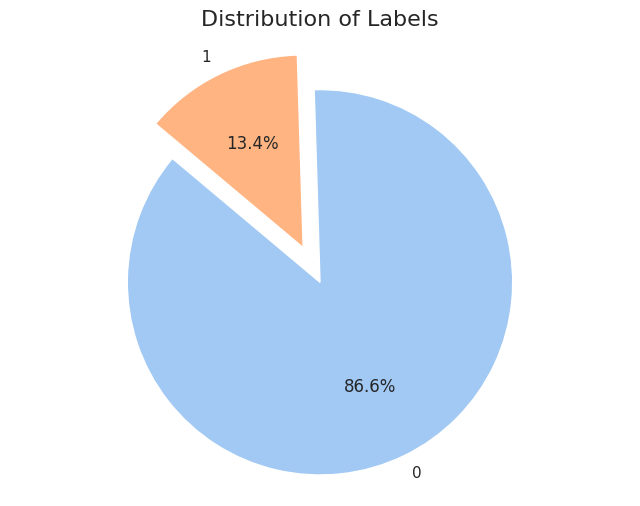

In [102]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:len(label_counts)]
plt.pie(label_counts, labels=label_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=[0.1]*len(label_counts))

# Add a title
plt.title('Distribution of Labels', fontsize=16)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [103]:
df['num_characters'] = df['cleaned_message'].apply(len)
df['num_words'] = df['cleaned_message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['cleaned_message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [104]:
df.head()

,label,message,cleaned_message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,82,16,1
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,23,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,101,21,1
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say,35,9,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,35,7,1


In [105]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,49.361989,9.053302,0.998564
std,38.139793,6.794694,0.037867
min,0.000000,0.000000,0.000000
25%,21.000000,4.000000,1.000000
50%,37.000000,7.000000,1.000000
75%,74.000000,13.000000,1.000000
max,442.000000,77.000000,1.000000


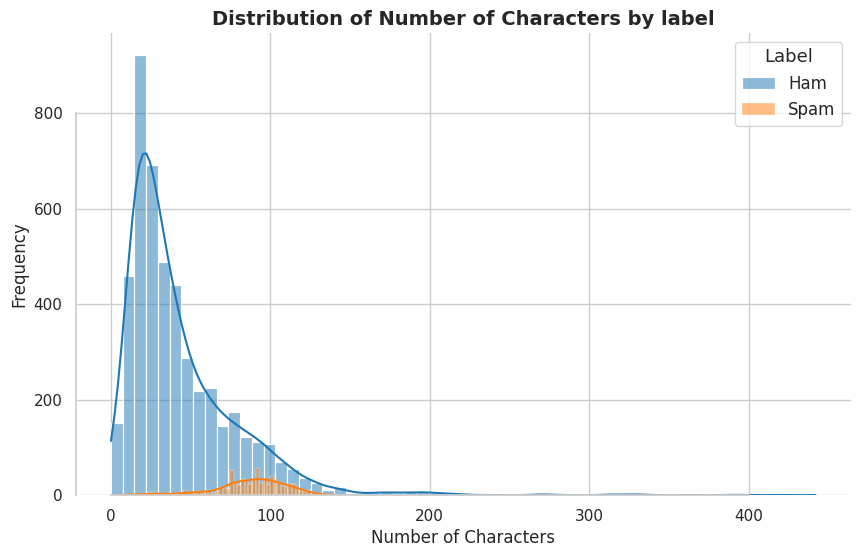

In [109]:
# Set the style and color palette
sns.set(style='whitegrid', palette='pastel')

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for label ham in a specific color
sns.histplot(df[df['label'] == 0]['num_characters'], color='#1f77b4', label='Ham', kde=True, bins=60)

# Plot the histogram for label spam in a specific color
sns.histplot(df[df['label'] == 1]['num_characters'], color='#ff7f0e', label='Spam', kde=True, bins=60)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Characters by label', fontsize=14, fontweight='bold')

# Add a legend
plt.legend(title='Label', title_fontsize='13', fontsize='12')

# Customize the appearance of the plot
sns.despine(trim=True)  # Remove the top and right spines for a cleaner look

# Show the plot
plt.show()

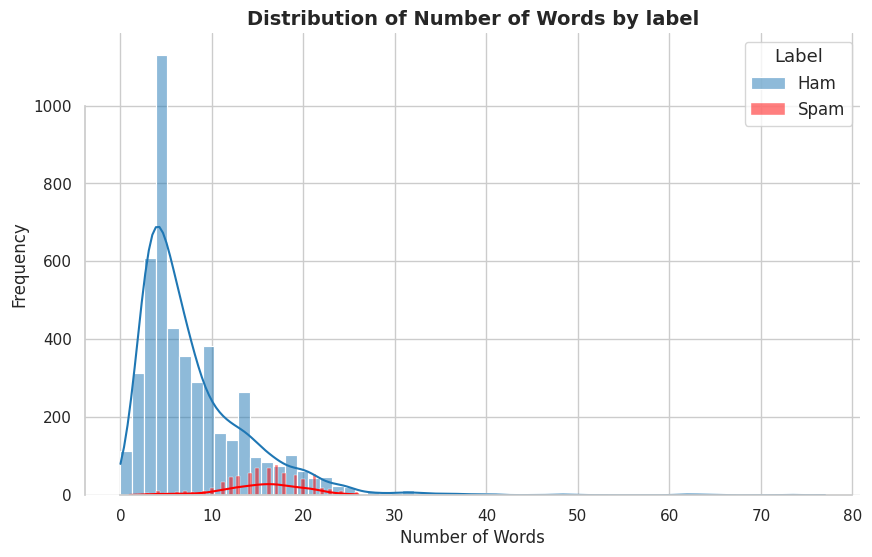

In [110]:
# Set the style and color palette
sns.set(style='whitegrid', palette='pastel')

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for label ham in a specific color
sns.histplot(df[df['label'] == 0]['num_words'], color='#1f77b4', label='Ham', kde=True, bins=60)

# Plot the histogram for target 1 in a specific color
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Spam', kde=True, bins=60)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Words by label', fontsize=14, fontweight='bold')

# Add a legend
plt.legend(title='Label', title_fontsize='13', fontsize='12')

# Customize the appearance of the plot
sns.despine(trim=True)  # Remove the top and right spines for a cleaner look

# Show the plot
plt.show()

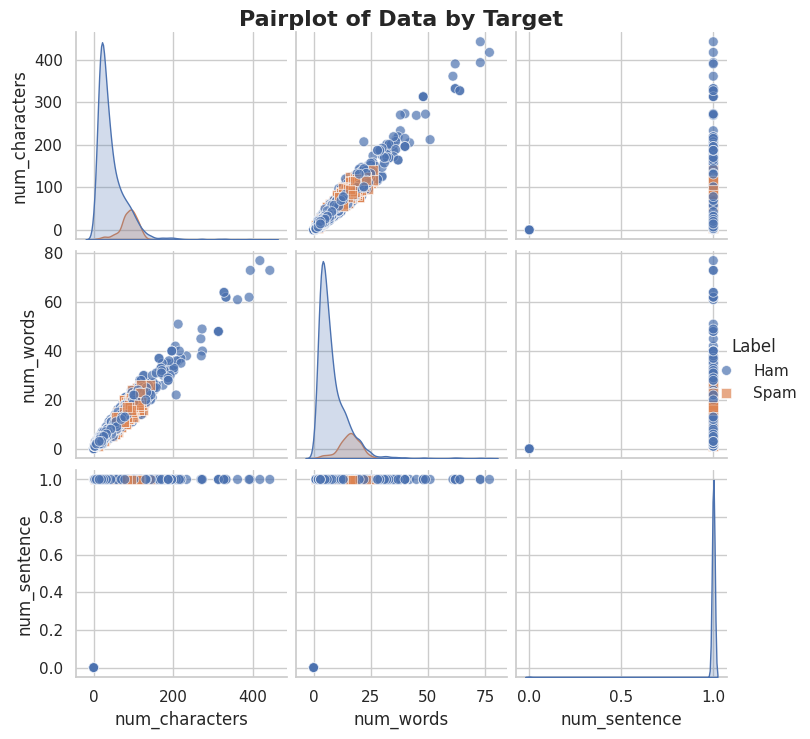

In [18]:
# Set the style and color palette
sns.set(style='whitegrid')

# Create a pairplot with custom styling
g = sns.pairplot(
    df,
    hue='label',
    diag_kind='kde',
    markers=["o", "s"],
    plot_kws={'alpha': 0.7, 's': 50},
    diag_kws={'shade': True}
)

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
new_labels = ["Ham", "Spam"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title('Label')

# Show the pairplot
plt.show();

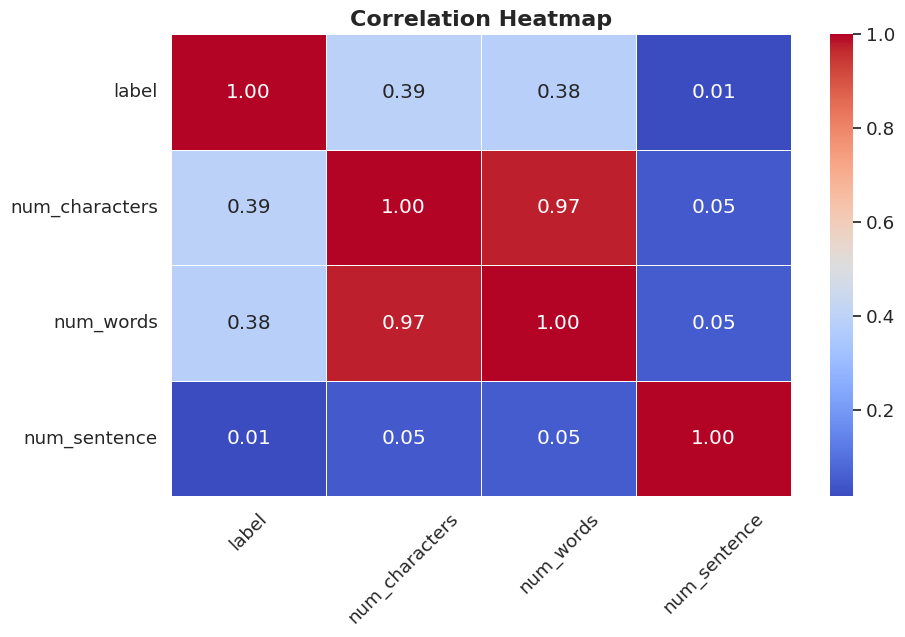

In [19]:
# Select the columns for the correlation matrix
correlation_matrix = df[['label', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

In [20]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, colormap='viridis').generate(text)
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

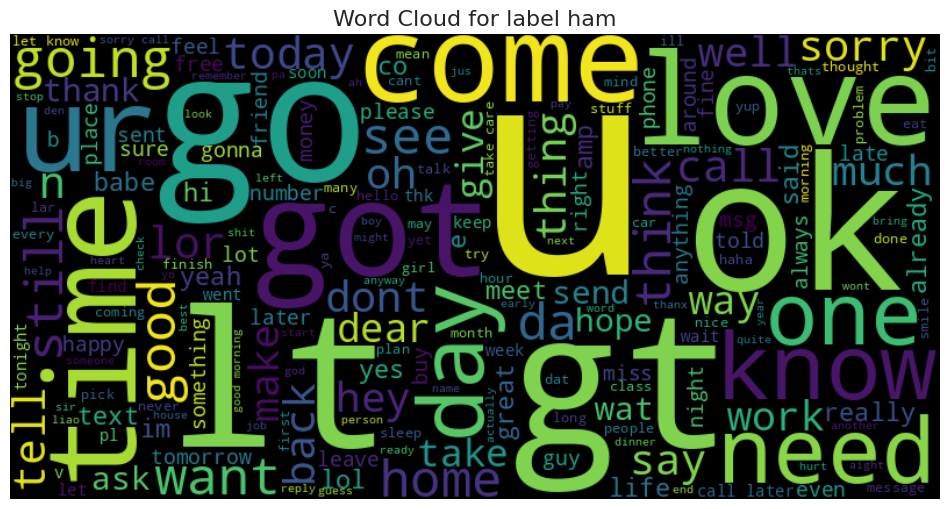

In [21]:
# Generate word cloud for target 0
text_target_0 = ' '.join(df[df['label'] == 0]['cleaned_message'])
generate_wordcloud(text_target_0, 'Word Cloud for label ham')

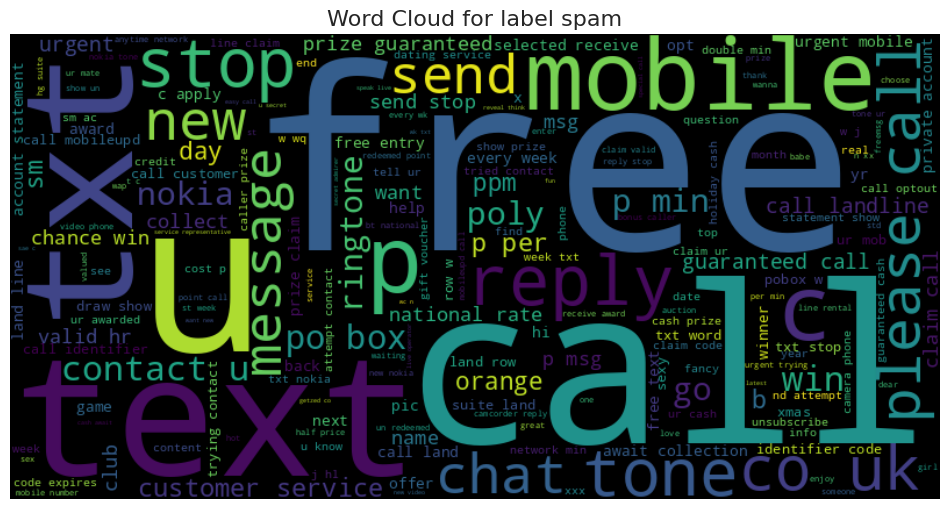

In [22]:
# Generate word cloud for label spam
text_target_1 = ' '.join(df[df['label'] == 1]['cleaned_message'])
generate_wordcloud(text_target_1, 'Word Cloud for label spam')

In [23]:
from collections import Counter

# Function to get the most common words in a class
def get_most_common_words(df, target, num_words=30):
    words = []
    for sentence in df[df['label'] == target]['cleaned_message'].tolist():
        for word in sentence.split():
            words.append(word)
    return Counter(words).most_common(num_words)

In [24]:
# Get most common words for spam (target = 1)
spam_words = get_most_common_words(df, 1)

# Get most common words for ham (target = 0)
ham_words = get_most_common_words(df, 0)

# Create DataFrames for plotting
spam_df = pd.DataFrame(spam_words, columns=['Word', 'Frequency'])
ham_df = pd.DataFrame(ham_words, columns=['Word', 'Frequency'])

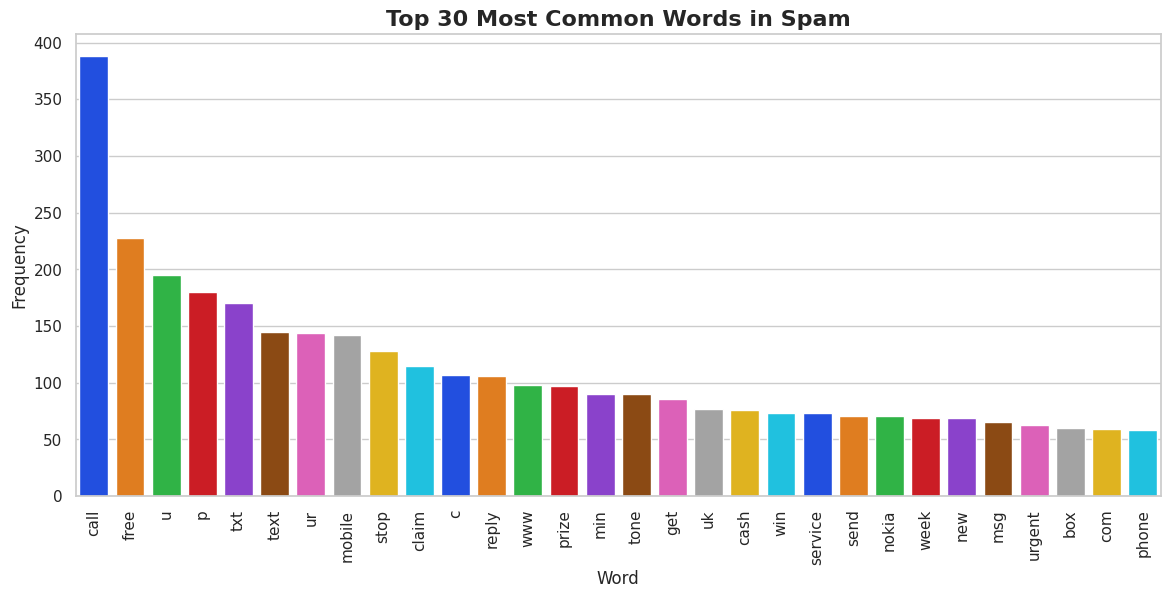

In [25]:
# Set the style and color palette
sns.set(style='whitegrid', palette='bright')

# Plot for spam (target = 1)
plt.figure(figsize=(14, 6))
sns.barplot(data=spam_df, x='Word', y='Frequency', palette='bright')
plt.title('Top 30 Most Common Words in Spam', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

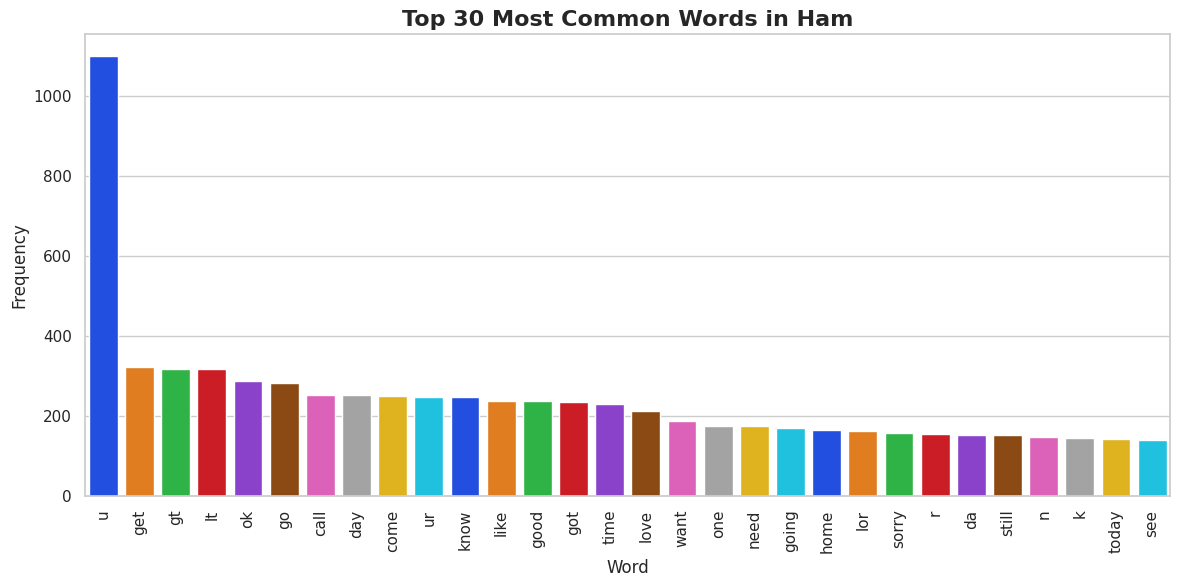

In [26]:
# Plot for ham (target = 0)
plt.figure(figsize=(14, 6))
sns.barplot(data=ham_df, x='Word', y='Frequency', palette='bright')
plt.title('Top 30 Most Common Words in Ham', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [28]:
y = df['label']

##**Spiltting the data**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 5000), (1115, 5000), (4457,), (1115,))

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_metrics(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label=1)

    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label=1)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, pos_label=1)

    # Return metrics as a dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    return metrics

In [32]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Set labels if not provided
    if labels is None:
        labels = sorted(set(y_true))

    # Plot confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve_multinomial_nb(model, X_test, y_test, classes=[0, 1]):
    # Compute ROC curve and ROC AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    y_prob = model.predict_proba(X_test)

    for i, cls in enumerate(classes):
        fpr[cls], tpr[cls], _ = roc_curve(y_test == cls, y_prob[:, i])
        roc_auc[cls] = roc_auc_score(y_test == cls, y_prob[:, i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for cls in classes:
        plt.plot(fpr[cls], tpr[cls], label=f'Class {cls} (AUC = {roc_auc[cls]:.2f})')

    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Naive Bayes Model')
    plt.legend(loc='lower right')

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##**Naive Bayes Model**

In [34]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB()

spam_detect_model.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_pred_nb = spam_detect_model.predict(X_test)

In [36]:
nb_results = calculate_metrics(y_test, y_pred_nb)

In [37]:
print("Naive Bayes Model Results:")
print("-------------------------")
for key, value in nb_results.items():
    print(f"{key}: {value:.4f}")

Naive Bayes Model Results:
-------------------------
Accuracy: 0.9803
Precision: 0.9045
Recall: 0.9530
F1 Score: 0.9281


In [38]:
print("Classification Report for Naive Bayes Model:\n")
print(classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes Model:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.90      0.95      0.93       149

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



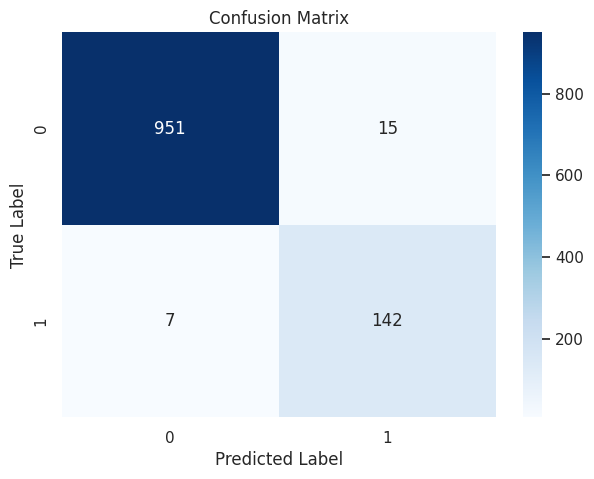

In [39]:
plot_confusion_matrix(y_test, y_pred_nb)

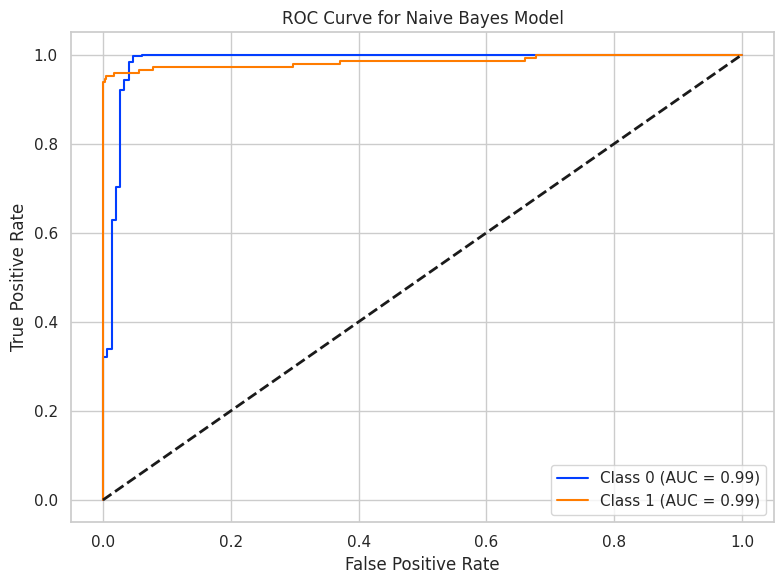

In [40]:
plot_roc_curve_multinomial_nb(spam_detect_model, X_test, y_test)

##**Support Vector Classification (SVM) model**

In [41]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True).fit(X_train, y_train)

In [42]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [43]:
# Calculate metrics
svm_results = calculate_metrics(y_test, y_pred_svm)

In [44]:
# Print SVM model results
print("SVM Model Results:")
print("-------------------")
for key, value in svm_results.items():
    print(f"{key}: {value:.4f}")

SVM Model Results:
-------------------
Accuracy: 0.9848
Precision: 0.9925
Recall: 0.8926
F1 Score: 0.9399


In [45]:
# Print classification report for SVM model
print("Classification Report for SVM Model:\n")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM Model:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



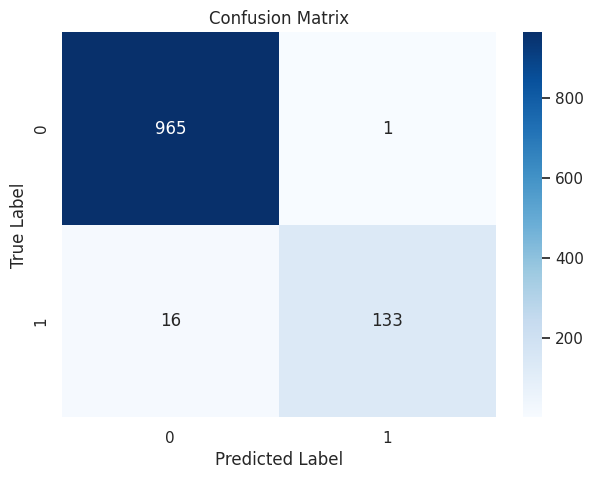

In [46]:
# Plot confusion matrix for SVM model
plot_confusion_matrix(y_test, y_pred_svm)

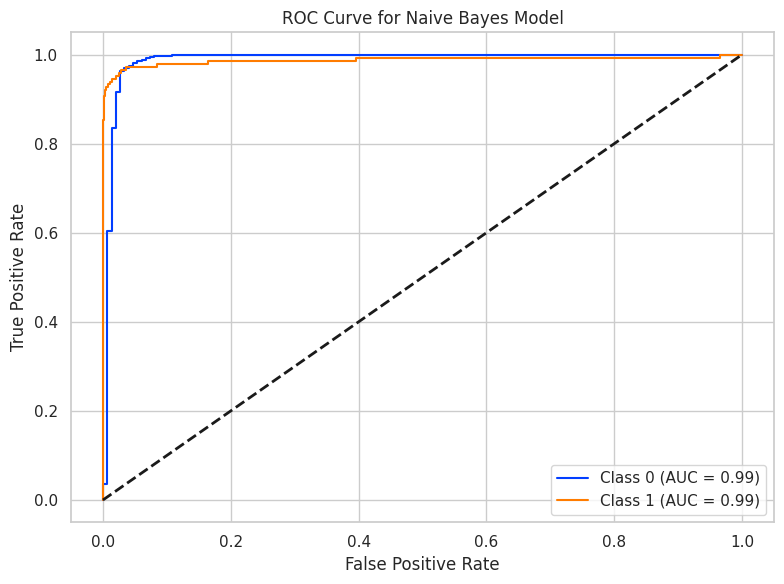

In [47]:
plot_roc_curve_multinomial_nb(svm_model, X_test, y_test)

##**XGBoost model**

In [48]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(gamma=5, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [50]:
# Calculate metrics
xgb_results = calculate_metrics(y_test, y_pred_xgb)

In [51]:
# Print XGBoost model results
print("XGBoost Model Results:")
print("-----------------------------")
for key, value in xgb_results.items():
    print(f"{key}: {value:.4f}")

XGBoost Model Results:
-----------------------------
Accuracy: 0.9767
Precision: 0.9556
Recall: 0.8658
F1 Score: 0.9085


In [52]:
# Print classification report for XGBoost model
print("Classification Report for XGBoost Model:\n")
print(classification_report(y_test, y_pred_xgb))

Classification Report for XGBoost Model:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



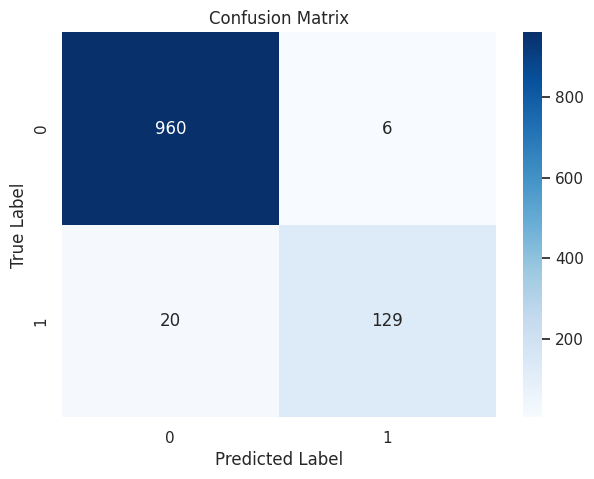

In [53]:
# Plot confusion matrix for XGBoost model
plot_confusion_matrix(y_test, y_pred_xgb)

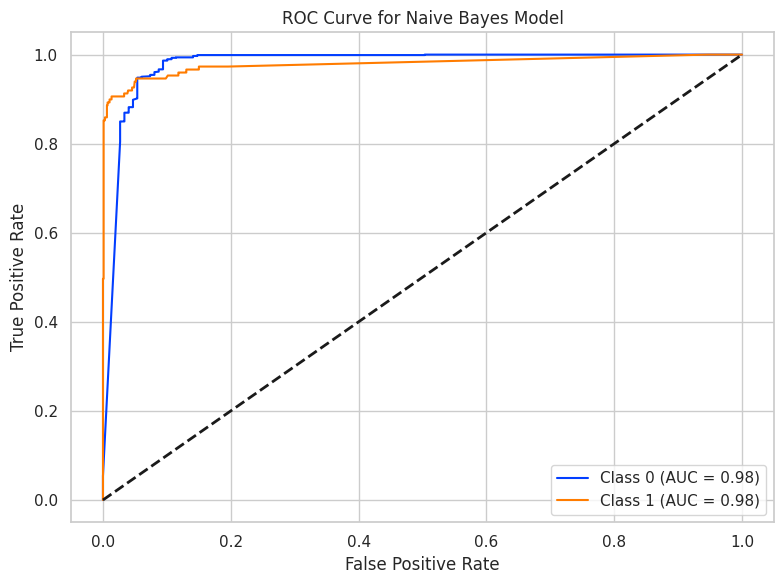

In [54]:
plot_roc_curve_multinomial_nb(xgb_model, X_test, y_test)

##**Random Forest Classifier Model**

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [57]:
# Calculate metrics
rf_results = calculate_metrics(y_test, y_pred_rf)

In [58]:
# Print Random Forest model results
print("Random Forest Model Results:")
print("-----------------------------")
for key, value in rf_results.items():
    print(f"{key}: {value:.4f}")

Random Forest Model Results:
-----------------------------
Accuracy: 0.9794
Precision: 1.0000
Recall: 0.8456
F1 Score: 0.9164


In [59]:
# Print classification report for Random Forest model
print("Classification Report for Random Forest Model:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest Model:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



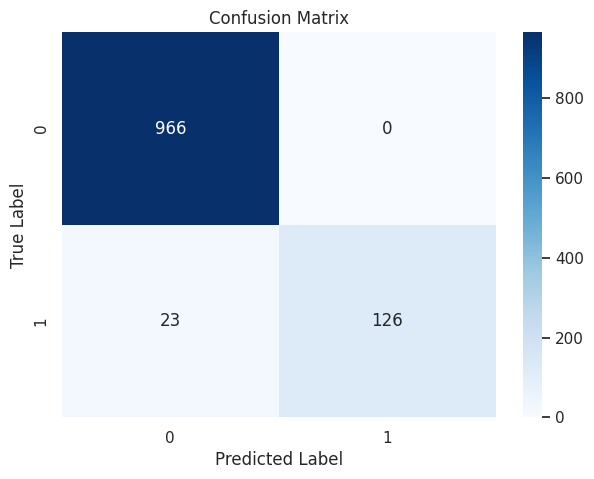

In [60]:
# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_test, y_pred_rf)

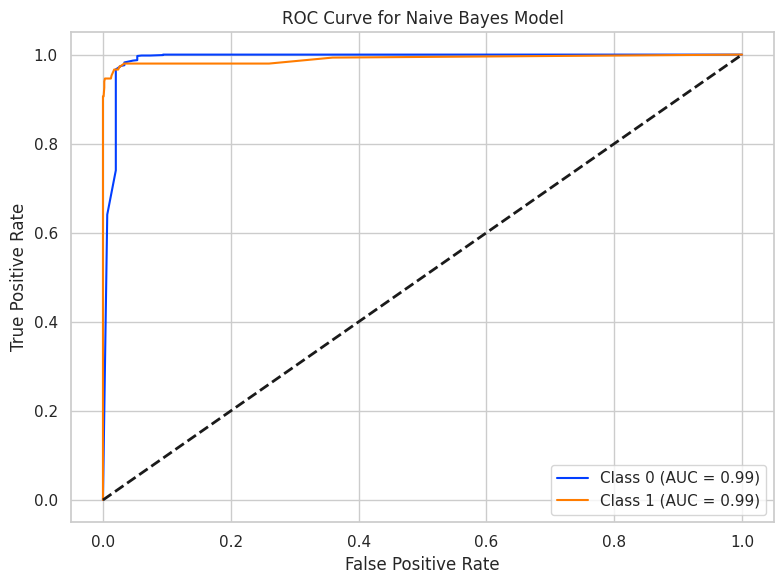

In [61]:
plot_roc_curve_multinomial_nb(rf_model, X_test, y_test)

##**Decision Tree Classifier Model**

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [64]:
# Calculate metrics
dt_results = calculate_metrics(y_test, y_pred_dt)

In [65]:
# Print Decision Tree model results
print("Decision Tree Model Results:")
print("-----------------------------")
for key, value in dt_results.items():
    print(f"{key}: {value:.4f}")

Decision Tree Model Results:
-----------------------------
Accuracy: 0.9758
Precision: 0.9296
Recall: 0.8859
F1 Score: 0.9072


In [66]:
# Print classification report for Decision Tree model
print("Classification Report for Decision Tree Model:\n")
print(classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree Model:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.93      0.89      0.91       149

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



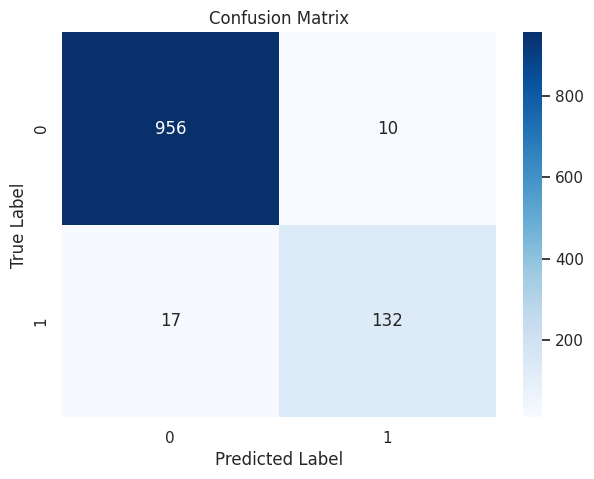

In [67]:
# Plot confusion matrix for Decision Tree model
plot_confusion_matrix(y_test, y_pred_dt)

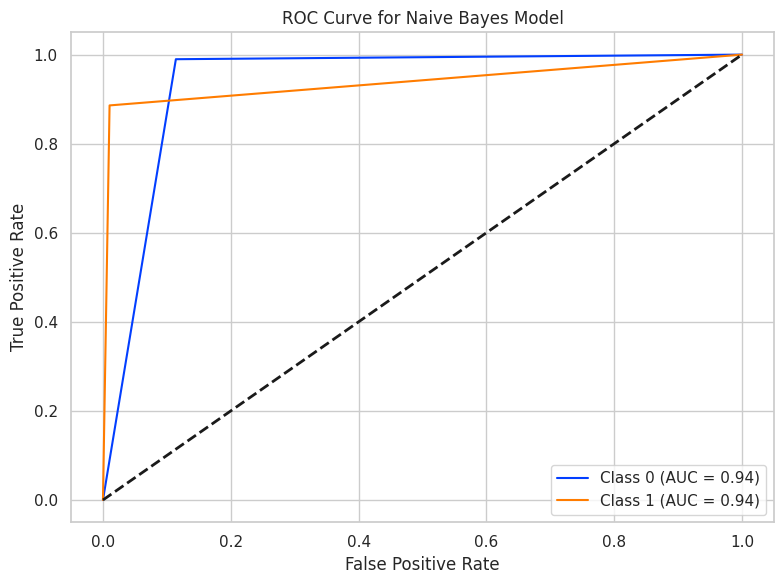

In [68]:
plot_roc_curve_multinomial_nb(dt_model, X_test, y_test)

##**Comparison of Model Performance Using Different Evaluation Metrics**

In [89]:
import plotly.graph_objects as go

# Define the models and their results
models_results = {
    'Naive Bayes': nb_results,
    'SVM': svm_results,
    'XGBoost': xgb_results,
    'Random Forest': rf_results,
    'Decision Tree': dt_results
}

# Define the metrics to compare
metrics = list(nb_results.keys())

# Create figure
fig = go.Figure()

# Add bar traces for each model and metric
for i, metric in enumerate(metrics):
    scores = [models_results[model][metric] for model in models_results.keys()]
    text_values = [f'{score:.3f}' for score in scores]  # Format scores to two decimal places
    fig.add_trace(go.Bar(
        x=list(models_results.keys()),
        y=scores,
        name=metric,
        text=text_values,  # Add formatted text to display values on top of the bars
        textposition='outside',  # Position text outside of the bars
        textangle=0,  # Rotate text to be horizontal
        marker=dict(color=f'rgba(0, 0, 255, {(i + 0.8) / len(metrics)})')  # Adjust color opacity
    ))

# Update layout
fig.update_layout(
    title='Evaluation Metrics for Different Models',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    legend_title='Metric',
    width=1300,  # Set the width of the plot
    height=600
)

# Show figure
fig.show()


##**Comparative ROC Curve Analysis of Machine Learning Models**

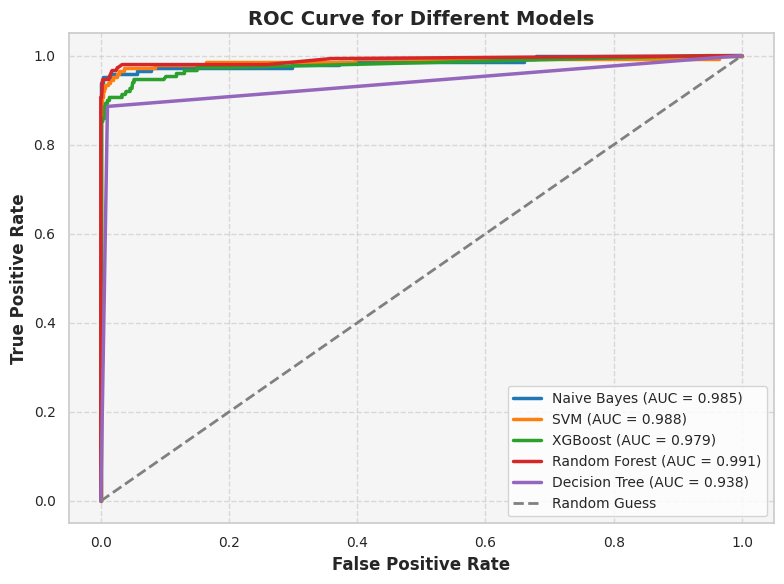

In [111]:
from sklearn.metrics import roc_curve, auc

# Set the style for the plot
sns.set(style="whitegrid")

# Define models
models = {
    'Naive Bayes': spam_detect_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

# Define line styles and colors for each model
colors = sns.color_palette("tab10", len(models))

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for i, (name, model) in enumerate(models.items()):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], linewidth=2.5,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess', linewidth=2)

# Set labels and title
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve for Different Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Enhance the background
plt.gca().set_facecolor('whitesmoke')

# Show plot
plt.tight_layout()
plt.show()
